# **일반화 성능 : 한번 예측한 결과는 믿을만 한가?**



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1.Data 전처리

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.drop('EmployeeNumber', axis = 1, inplace = True)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,33,Research & Development,7,3,3,Male,3,Married,11691,0,No,11,0,14,3,4,13
1,0,35,Research & Development,18,2,3,Male,4,Single,9362,2,No,11,0,10,2,3,2
2,0,42,Research & Development,6,3,3,Male,1,Married,13348,9,No,13,1,18,3,4,13
3,0,46,Sales,2,3,3,Female,1,Married,17048,8,No,23,0,28,2,3,26
4,1,22,Research & Development,4,1,3,Male,3,Single,3894,5,No,16,0,4,3,3,2


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|----|----|----|----|----|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [ ]:
target = 'Attrition'
x = data.drop(target, axis=1)
y = data.loc[:, target]

* 가변수화

In [ ]:
dum_cols = ['Department','Gender','JobSatisfaction','MaritalStatus','OverTime'	]
x = pd.get_dummies(x, columns = dum_cols, drop_first = True)

## 2.Random Sampling

* 데이터를 랜덤에서 분할하여 모델링 & 예측을 수행합니다.
* iris는 feature들이 모두 숫자이므로 dummy variable은 필요하지 않음
* Scaling만 필요


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

### (1) 반복 실행해 봅시다.


* 아래 셀은 데이터 분할 > 스케일링 > 모델링 코드를 모두 모아놓았습니다.
* Ctrl+Enter로 반복 실행해 봅시다.

In [ ]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2)

# DecisionTree 모델링
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
pred = model.predict(x_val)
accuracy_score(y_val, pred)

0.7957446808510639

정분류율은 몇 %인가요?  
값이 달라지나요? 값이 달라지는 원인은 무엇인가요?   
값이 달라진다면 모델의 성능을 어떻게 믿을 수 있을까요?  

### (2) 여러번 반복해서 평균을 계산해 봅시다.

**여러 번 반복 실행 -> 평균 성능**

In [ ]:
from tqdm.auto import tqdm

In [ ]:
# 50번 반복 실행하여 결과를 담아 냅시다.
r_dt = [] # result frotm decision tree
for i in tqdm(range(50)):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2)

    model = DecisionTreeClassifier(max_depth = 3)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    r_dt.append(accuracy_score(y_val, pred))

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
r_dt

[0.825531914893617,
 0.825531914893617,
 0.825531914893617,
 0.851063829787234,
 0.8595744680851064,
 0.8468085106382979,
 0.8127659574468085,
 0.8595744680851064,
 0.8638297872340426,
 0.8042553191489362,
 0.8340425531914893,
 0.8297872340425532,
 0.8468085106382979,
 0.8170212765957446,
 0.8595744680851064,
 0.8468085106382979,
 0.8297872340425532,
 0.8553191489361702,
 0.8340425531914893,
 0.851063829787234,
 0.8085106382978723,
 0.8553191489361702,
 0.8127659574468085,
 0.8382978723404255,
 0.8127659574468085,
 0.8127659574468085,
 0.8723404255319149,
 0.851063829787234,
 0.8340425531914893,
 0.8297872340425532,
 0.8340425531914893,
 0.8595744680851064,
 0.8595744680851064,
 0.851063829787234,
 0.825531914893617,
 0.825531914893617,
 0.8340425531914893,
 0.8212765957446808,
 0.8297872340425532,
 0.8,
 0.8425531914893617,
 0.825531914893617,
 0.8212765957446808,
 0.7914893617021277,
 0.8553191489361702,
 0.9106382978723404,
 0.8042553191489362,
 0.8042553191489362,
 0.85531914893617

평균과 표준편차를 구해 봅시다.

In [ ]:
r_dt_m, r_dt_s = np.mean(r_dt), np.std(r_dt)
print(f'평균 : {r_dt_m:.4f}, 표준편차 : {r_dt_s:.4f}')

평균 : 0.8363, 표준편차 : 0.0222


값의 분포를 살짝 살펴보면

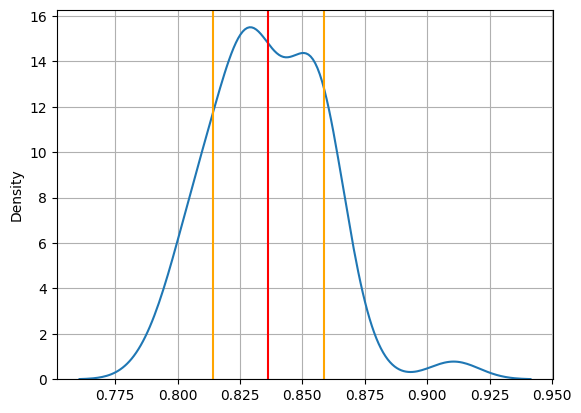

In [ ]:
# 밀도함수 그래프
sns.kdeplot(r_dt)

# 평균값 수직선 그리기
plt.axvline(r_dt_m, color = 'r')

# 표준편차 수직선 그리기
plt.axvline(r_dt_m + r_dt_s, color = 'orange')
plt.axvline(r_dt_m - r_dt_s, color = 'orange')

plt.grid()
plt.show()

### (3) knn 알고리즘으로 실행해 봅시다.

k를 지정하지 말고(default)로 50회 수행한 후 결과를 담고 평균으로 일반화 성능을 얻어 봅시다.

In [ ]:
# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
r_knn = []
scaler = MinMaxScaler()
for i in tqdm(range(50)) :
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2)
    x_train_s = scaler.fit_transform(x_train)
    x_val_s = scaler.transform(x_val)
    m = KNeighborsClassifier()
    m.fit(x_train_s, y_train)
    pred = m.predict(x_val_s)
    r_knn.append(accuracy_score(y_val, pred))

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
r_knn_m, r_knn_s = np.mean(r_knn), np.std(r_knn)
print(f'평균 : {r_knn_m:.4f}, 표준편차 : {r_knn_s:.4f}')

평균 : 0.8380, 표준편차 : 0.0215


### (4) 모델 비교하기

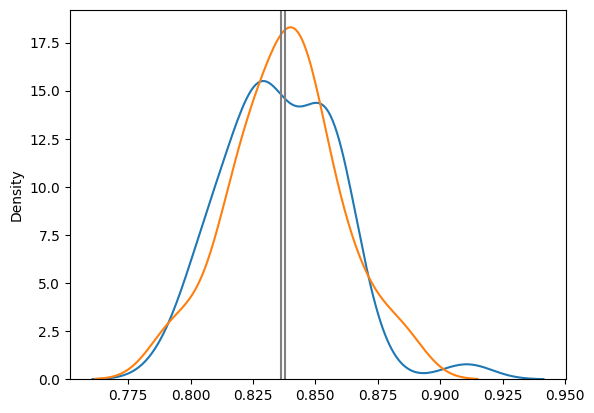

In [ ]:
# 밀도함수 그래프
sns.kdeplot(r_dt) # 파란색
sns.kdeplot(r_knn) # 주황색

# 평균값을 수직선으로 그리기
plt.axvline(r_dt_m, color = 'gray')
plt.axvline(r_knn_m, color = 'gray')

plt.show()

## 3.k-fold Cross Validation

계획적으로 분할, 학습, 검증하는 방식을 사용해보자
**-> 데이터를 k(cv)등분해서 k번 수행하고 평균 성능(모든 데이터가 한번씩 validation으로)**


### (1) 교차검증 : DT

* cross validation 함수를 이용하여 모델을 검증합니다.

In [ ]:
# 필요한 패키지, 함수 로딩
from sklearn.model_selection import cross_val_score

In [ ]:
# 모델 선언
model = DecisionTreeClassifier(max_depth = 3)

* cross_val_score(모델, x, y, cv) : 교차 검증, cv=k=10
    * 여기에서 x, y는 train + val

In [ ]:
# train + validation set을 이용하여 학습, 예측, 평가를 한번에. (여기서는 .fit 이 아님!)
cv_result = cross_val_score(model, x, y, cv=10) # model.fit(x_train, y_train)
print(cv_result)
print(cv_result.mean(), cv_result.std())

[0.84745763 0.81355932 0.81355932 0.8559322  0.8559322  0.8034188
 0.88034188 0.82051282 0.83760684 0.82905983]
0.8357380848906273 0.02291436687802278


### (2) 교차검증 : knn
knn알고리즘으로 10-fold cv를 수행해 봅시다.

In [ ]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

In [ ]:
model1 = KNeighborsClassifier()

cv_r2 = cross_val_score(model1, x_s, y, cv = 10)
print(cv_r2)
print(cv_r2.mean(), cv_r2.std())

[0.86440678 0.84745763 0.8220339  0.84745763 0.8559322  0.82051282
 0.82051282 0.83760684 0.82051282 0.86324786]
0.8399681297986381 0.017230699117274862
